# CNN_MNIST : Basic CNN

## import

In [1]:
# tensorflow 모듈 import 
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [96]:
# 2차원 배열 파일 메모리에 로드loaded_X_train = np.loadtxt('../data/skyggle_MNIST/X_train.txt')
loaded_X_train = np.loadtxt('../data/skyggle_MNIST/X_train.txt')
loaded_y_train = np.loadtxt('../data/skyggle_MNIST/y_train.txt')
loaded_X_test = np.loadtxt('../data/skyggle_MNIST/X_test.txt')

In [97]:
# 2차원 배열을 3차원으로 
X_train_np = loaded_X_train.reshape(60000, 28, 28)
y_train_np = loaded_y_train.astype(int)
X_test = loaded_X_test.reshape(10000, 28, 28)
#X_train = X_train_.astype(int)
#y_train = y_train_all.astype(int)
print(X_train_np.shape)
print(y_train_np.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [98]:
# x_train[0] 데이터 확인
# x_traini[0] 값 출력
X_train_np[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [99]:
y_train_np[0]

5

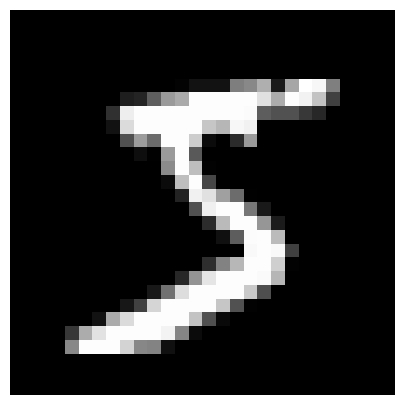

In [100]:
# 샘플 이미지 출력
plt.figure(figsize=(5,5))
plt.imshow(X_train_np[0], cmap='gray')
plt.axis('off')
plt.show();

In [101]:
# 타겟 분포확인
pd.Series(y_train_np).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

#### 데이터 준비: 분할, 정규화, 차원 변경, 원핫인코딩

In [102]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np,
                                                  stratify=y_train_np,
                                                  test_size=0.2,
                                                  random_state=42)

In [103]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [104]:
# 데이터 정규화
X_train = X_train / 255
X_val = X_val / 255

In [105]:
# 심층 신경망 입력을 위해 데이터 차원 변경
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)

X_train.shape, X_val.shape

((48000, 784), (12000, 784))

In [106]:
# y_train, y_val 원핫인코딩(=카테고리화)
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

## 순차 심층 신경망(DNN) 구축하기

In [107]:
# 모델 구조 및 최적화 설계
from keras.models import Sequential
from keras.layers import Dense

dnn_model = tf.keras.Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy',
                  metrics='accuracy',
                  optimizer='adam')
#model = Sequential()
#model.add(Dense(32, activation='relu', input_shape=(784,)))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(10, activation='softmax'))

In [108]:
dnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [31]:
!pip install pydot
!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [109]:
#모델 구조 시각화
from tensorflow.keras.utils import plot_model

plot_model(dnn_model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [110]:
# dnn_model 학습 
dnn_hist = dnn_model.fit(X_train, y_train_encoded, epochs=5,
                          validation_data=(X_val, y_val_encoded))


Epoch 1/5


2023-02-23 11:30:41.874105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1494/1500 [============================>.] - ETA: 0s - loss: 0.2491 - accuracy: 0.9290

2023-02-23 11:30:54.192948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 15s 9ms/step - loss: 0.2486 - accuracy: 0.9290 - val_loss: 0.1377 - val_accuracy: 0.9599
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1042 - accuracy: 0.9687 - val_loss: 0.1127 - val_accuracy: 0.9657
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0679 - accuracy: 0.9796 - val_loss: 0.0909 - val_accuracy: 0.9744
Epoch 4/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.0872 - val_accuracy: 0.9753
Epoch 5/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0361 - accuracy: 0.9880 - val_loss: 0.0913 - val_accuracy: 0.9726


In [111]:
# 모델을 파일로 저장
dnn_model.save('mnist_20230223.h5')

In [113]:
# 모델 복원
h5_loaded = keras.models.load_model('mnist_20230223.h5')

In [116]:
# 모델 성능 테스트 
print(dnn_model.evaluate(X_val, y_val_encoded))
print(h5_loaded.evaluate(X_val, y_val_encoded))

375/375 [==============================] - 3s 7ms/step - loss: 0.0913 - accuracy: 0.9726
[0.09133534878492355, 0.9725832939147949]
 16/375 [>.............................] - ETA: 2s - loss: 0.1075 - accuracy: 0.9707

2023-02-23 11:33:45.562979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 0.0913 - accuracy: 0.9726
[0.09133534878492355, 0.9725832939147949]


In [ ]:
# 복원한 모델 성능 테스트


## Simple CNN

####  데이터셋 준비하기

In [41]:
# 데이터 분할
X_train, X_val, y_train, y_test = train_test_split(X_train_np, y_train_np,
                                                   stratify=y_train_np,
                                                   test_size=0.2,
                                                   random_state=42)

In [43]:
# CNN은 (데이터샘플 수, 행의 갯수, 열의 갯수, 채널수)의 형태로 제공되어야 함.
#When using this layer as the first layer in a model, 
#provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), 
#e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last". 
#You can use None when a dimension has variable size.
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# 채널 추가 :minst 데이터셋은 색을 나타내는 채널이 1개인 모노컬러. 색상 채널 추가
print(X_train_np.shape)

X_train_in = X_train[..., tf.newaxis]
X_val_in = X_val[..., tf.newaxis]
X_test_in = X_test[..., tf.newaxis]

print(X_train_in.shape, X_val_in.shape, X_test_in.shape)


(60000, 28, 28)
(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)


In [49]:
# Sequential API를 사용하여 샘플 모델 생성: 합성곱 레이어1개, 풀링 레이어 1개
from keras.layers import Conv2D, MaxPooling2D, Flatten

cnn_model = tf.keras.Sequential([
                Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                       input_shape=(28,28,1), name='conv'),
                MaxPooling2D((2,2), name='pool'),
                Flatten(),
                Dense(10,activation='softmax')
])

In [50]:
# 모델 컴파일
cnn_model.compile(loss='sparse_categorical_crossentropy', 
                  metrics='accuracy', optimizer='adam')

In [51]:
#모델 구조 파악

# conv 레이어 output( valid padding : 28, 28 -> 26, 26의 특성맵이 32는 커널(필터) 수만큼 생성)
# (28, 28, 1) 이미지에 서로 다른 32개 커널을 적용해서 32종류의 피처(특징)을 추출
# pool 레이어: (2, 2) 풀링을 적용하므로 이미지 크기가 1/2로 줄어듬(13, 13)

# conv param: 320  (학습 가능한 파라미터 수)
#  ( 3* 3(커널의 크기) * 1( 채널 수) * 필터수(32) = 288 ) + (32(필터별 상수항, 바이어스) = 320
cnn_model.summary()

## conv_param = (3 * 3) * 32 + 32(bias)
## dense_9_param = 5408 * 10 + 10

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [58]:
pip install pydot
pip install graphviz

SyntaxError: invalid syntax (2451845687.py, line 1)

In [57]:
#모델 구조 시각화
from keras.utils import plot_model

plot_model(cnn_model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


* 모델 구조 세부 확인

In [59]:
# 모델의 입력 텐서 확인
cnn_model.input
# (None, 28, 28, 1) : 가장 앞에 있는 축이 None인 것은 batch크가기 들어오는 자리로 배치 크리로 어떤 값이든 가능하다는 뜻

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [61]:
# 모델의 출력 텐서 
cnn_model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_9')>

In [62]:
# 모델의 레이어 확인
cnn_model.layers

In [63]:
# 레이어 선택: 리스트 인덱싱
cnn_model.layers[0]

In [64]:
# 첫 번째 레이어 입력
cnn_model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
#첫 번째 레이어 출력
cnn_model.layers[0].output

In [66]:
# 첫 번째 레이어의 가중치
cnn_model.layers[0].weights[0][0][0]

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[-0.05350117,  0.09276827,  0.05257404, -0.14022663,  0.08172557,
        -0.03108435, -0.05894842,  0.13990779,  0.13022421,  0.01598527,
        -0.09532547, -0.10391201, -0.10452561,  0.00989531,  0.02015507,
         0.00275883, -0.00496802, -0.09784339, -0.03686306, -0.00224382,
         0.01905048, -0.08308899, -0.09032921,  0.14180331, -0.03709526,
        -0.0343172 ,  0.0774094 ,  0.05177011, -0.02861769,  0.08075228,
         0.05082749,  0.06650697]], dtype=float32)>

In [69]:
# 첫 번째 레이어의 커널 가중치
cnn_model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.05350117,  0.09276827,  0.05257404, -0.14022663,
           0.08172557, -0.03108435, -0.05894842,  0.13990779,
           0.13022421,  0.01598527, -0.09532547, -0.10391201,
          -0.10452561,  0.00989531,  0.02015507,  0.00275883,
          -0.00496802, -0.09784339, -0.03686306, -0.00224382,
           0.01905048, -0.08308899, -0.09032921,  0.14180331,
          -0.03709526, -0.0343172 ,  0.0774094 ,  0.05177011,
          -0.02861769,  0.08075228,  0.05082749,  0.06650697]],

        [[ 0.01479454, -0.11101073,  0.04229853,  0.13902901,
           0.09106952,  0.0581906 ,  0.13015549, -0.13560298,
           0.12393694,  0.04301721, -0.05212449, -0.1418167 ,
           0.11973895, -0.03346382,  0.07745166,  0.11801143,
           0.02135228,  0.08338763, -0.02018974, -0.08778479,
           0.0697168 , -0.02341795,  0.09021264, -0.08494736,
           0.04142226, -0.09527446, -0.01466471,  0.030072

In [70]:
# 모델 훈련
hist = cnn_model.fit(X_train_in, y_train,
                      validation_data=(X_val_in, y_val), epochs=10)

Epoch 1/10


2023-02-23 10:50:36.852921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1494/1500 [============================>.] - ETA: 0s - loss: 0.6104 - accuracy: 0.9332

2023-02-23 10:50:46.091241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 11s 6ms/step - loss: 0.6090 - accuracy: 0.9333 - val_loss: 0.1304 - val_accuracy: 0.9652
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0879 - accuracy: 0.9739 - val_loss: 0.1010 - val_accuracy: 0.9707
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0689 - accuracy: 0.9789 - val_loss: 0.1235 - val_accuracy: 0.9665
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 0.1381 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.1238 - val_accuracy: 0.9699
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0490 - accuracy: 0.9854 - val_loss: 0.1483 - val_accuracy: 0.9695
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.1532 - val_accuracy: 0.9732
Ep

In [72]:
df = pd.DataFrame(hist.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.608958,0.933292,0.130411,0.965167
1,0.087859,0.973896,0.101012,0.970750
2,0.068909,0.978875,0.123522,0.966500
3,0.059328,0.982063,0.138105,0.972167
4,0.057771,0.982125,0.123770,0.969917
5,0.048966,0.985354,0.148276,0.969500
6,0.039699,0.987896,0.153213,0.973250
7,0.039336,0.988542,0.198851,0.967083
8,0.035631,0.990042,0.181734,0.973250
9,0.035492,0.991250,0.230615,0.969083


#### 손실과 정확도 그래프: 모델 성능 평가

* 모델 학습 결과 시각화

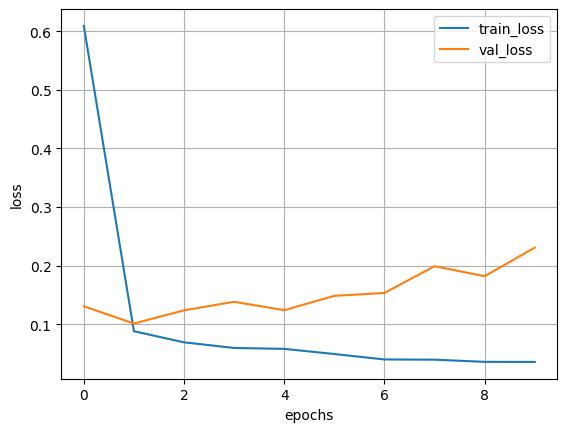

In [73]:
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show();

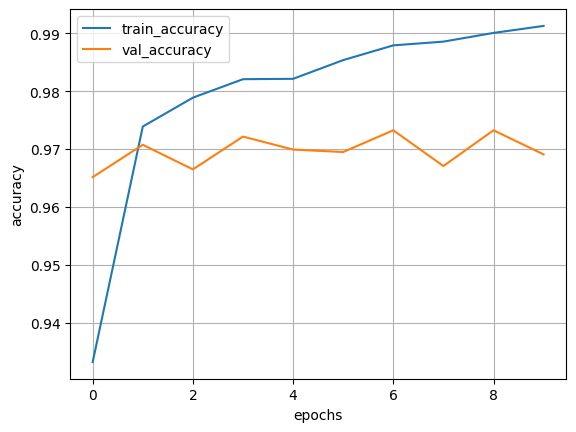

In [74]:
# 시각화
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show();


* 예측값 생성 및 제출

In [75]:
y_pred_proba = cnn_model.predict(X_test_in)

 47/313 [===>..........................] - ETA: 0s

2023-02-23 11:09:16.032556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [76]:
len(y_pred_proba)

10000

In [80]:
np.set_printoptions(suppress=True)
y_pred_proba[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.00003426, 0.9999423 , 0.00000012, 0.        ,
        0.        , 0.00002341, 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [81]:
np.argmax(y_pred_proba, axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [86]:
submission = pd.read_csv('../data/skyggle_MNIST/submission.csv')
submission

,no,label
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
9995,9996,NaN
9996,9997,NaN
9997,9998,NaN
9998,9999,NaN


In [88]:
submission['label'] = np.argmax(y_pred_proba, axis=-1)
submission

,no,label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
...,...,...
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5


In [89]:
submission.to_csv('cnn_mnist.csv', index=False)